# DM Pendule pesant et portraits de phase

Jules SANGLIER - MPSI1

Soit $\epsilon$ un pas.\
Alors,
$$x'(t) = \lim\limits_{\epsilon \to 0}\frac{x(t+\epsilon)-x(t)}{\epsilon}$$
D'où, $$x(t+\epsilon) \approx \epsilon x'(t) + x(t)$$ Notons
$$x_{i+1} = x_{i} + \epsilon x'_{i}
                    = x_{i} + \epsilon v_{i}$$ car $x'$ est la dérivée
de la position par rapport au temps. De même,
$$v'(t) = \lim\limits_{\epsilon \to 0}\frac{v(t+\epsilon)-v(t)}{\epsilon}$$
D'où, $$v(t+\epsilon) \approx \epsilon v'(t) + v(t)$$ De manière
analogue, notons $v_i$ les valeurs successives de la solution approchée.
D'où, $$v_{i+1} = v_{i} + \epsilon v'_{i}
                    = v_{i} + \frac{d^2\theta}{dt}\epsilon$$ car
$\frac{d^2\theta}{dt}=-\omega_{0}^2\theta$ où $\theta$ est la position.
Donc, $$v_{i+1} = v_{i} -\omega_{0}^2\theta\epsilon
                    = v_{i} -\omega_{0}^2x_{i}\epsilon$$ Finalement,

$\left \{
   \begin{array}{r c l}
      x_{i+1} = x_{i} + \epsilon v_{i} \\
      v_{i+1} = v_{i} -\omega_{0}^2x_{i}\epsilon
   \end{array}
   \right .$ où $x_{i+1}$ est la position du pendule à un instant $t+dt$
et $v_{i+1}$ la vitesse du pendule à un instant $t+dt$.

In [ ]:
import matplotlib.pyplot as plt
from math import cos
from math import sin

1.1.2)

In [8]:
def solve(w0, epsilon, a, b, x0, v0):
    temps = [a]
    position = [x0]
    vitesse = [v0]
    t = a
    x = x0
    v = v0
    while t < (b-epsilon):
        v_i1 = v - (w0**2) * x * epsilon
        x_i1 = x + epsilon * v
        x = x_i1
        v = v_i1

        t = t + epsilon 
        temps.append(t)
        position.append(x_i1)
        vitesse.append(v_i1)
            
    return (temps, position, vitesse)

1.1.3)

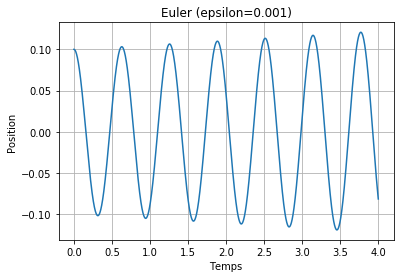

In [10]:
s = solve(10, 1e-3, 0, 4, 0.1, 0)
plt.plot(s[0], s[1])

plt.xlabel("Temps")
plt.ylabel("Position")
plt.title("Euler (epsilon=0.001)")
plt.grid(True)
plt.show()

1.1.4)

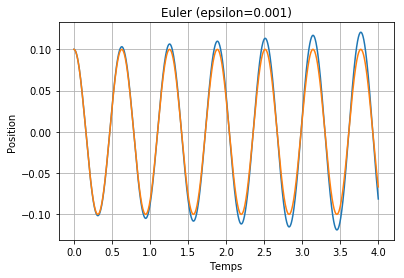

In [13]:
def sol_analytique(theta0, w0, t):
    return theta0 * cos(w0*t)


s = solve(10, 1e-3, 0, 4, 0.1, 0)
plt.plot(s[0], s[1])
position_analytique = []
t_len = len(s[0])
for i in range(t_len):
    position_analytique.append(sol_analytique(0.1, 10, s[0][i]))

plt.plot(s[0], position_analytique)
plt.xlabel("Temps")
plt.ylabel("Position")
plt.title("Euler (epsilon=0.001)")
plt.grid(True)
plt.show()

1.1.5)

In [18]:
def affichage_euler(euler, epsilon):
    a = 0
    b = 4
    s = euler(10, epsilon, a, b, 0.1, 0)

    position_analytique = []
    t_len = len(s[0])
    for i in range(t_len):
        position_analytique.append(sol_analytique(0.1, 10, s[0][i]))

    plt.plot(s[0], s[1])
    plt.plot(s[0], position_analytique)

    plt.xlabel("Temps")
    plt.ylabel("Position")
    plt.title("Euler (epsilon=" + str(epsilon) + ")")
    plt.grid(True)
    plt.show()

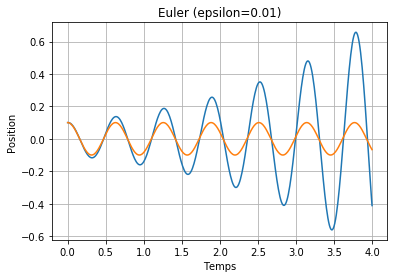

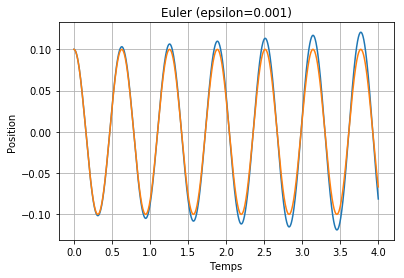

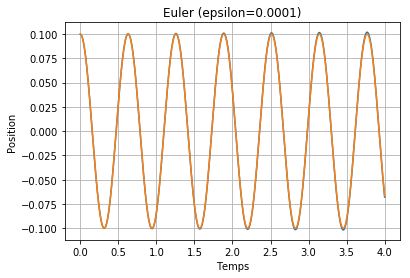

In [21]:
affichage_euler(solve, 0.01)
affichage_euler(solve, 0.001)
affichage_euler(solve, 0.0001)

1.2.1)

In [19]:
def solve_v2(w0, epsilon, a, b, x0, v0):
    temps = [a]
    position = [x0]
    vitesse = [v0]
    t = a
    x = x0
    v = v0
    while t < (b-epsilon):
        x_i1 = x + epsilon * v
        v_i1 = v - (w0**2) * x_i1 * epsilon
        x = x_i1
        v = v_i1

        t = t + epsilon 
        temps.append(t)
        position.append(x_i1)
        vitesse.append(v_i1)
	
    return (temps, position, vitesse)

1.2.2)

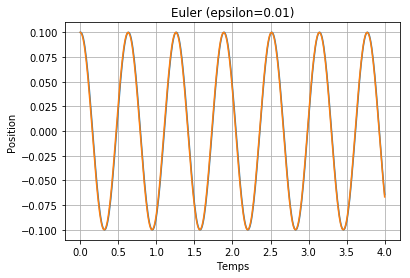

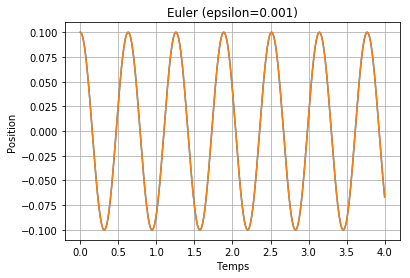

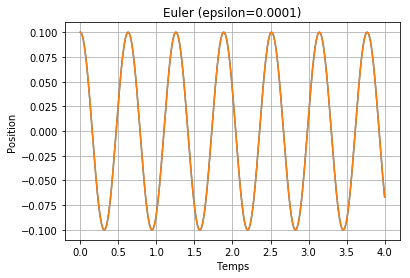

In [20]:
affichage_euler(solve_v2, 0.01)
affichage_euler(solve_v2, 0.001)
affichage_euler(solve_v2, 0.0001)

1.2.3)

La différence entre ces deux schémas réside dans le fait d'utiliser la nouvelle position notée $x_{i+1}$ pour la vitesse $v_{i+1}$, ainsi les calculs sont beaucoup plus précis.

1.3.1)

In [22]:
def vitesse_reduite(w0, vitesse_array):
	    n = len(vitesse_array)
	    for i in range(n):
	        vitesse_array[i] *= 1/w0

In [23]:
def affichage_portraits_de_phase():
    epsilon = 0.0001
    a = 0
    b = 4
    w0 = 10

    for i in range(1, 6):
        s = solve_v2(w0, epsilon, a, b, i/10, 0)
        vitesse_reduite(w0, s[2])
        plt.plot(s[1], s[2])
	
    plt.axis("equal")
    plt.xlabel("Position")
    plt.ylabel("Vitesse reduite")
    plt.title("Portrait de phase (epsilon=" + str(epsilon) + ")")
    plt.show()

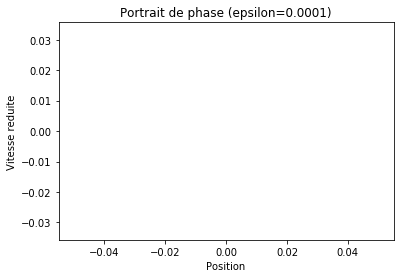

In [25]:
affichage_portraits_de_phase()